In [23]:
import os
import cv2
import numpy as np

In [24]:
dataset_path = 'C:/GestureIEEE/dataset'

In [25]:
print(os.listdir(dataset_path))

['01_palm', '02_fist', '03_thumbs-up', '04_thumbs-down', '05_index-right', '06_index-left', '07_no-gesture']


In [26]:
images=[]
labels=[]

In [27]:
classes = ['01_palm', '02_fist', '03_thumbs-up', '04_thumbs-down', '05_index-right', '06_index-left', '07_no-gesture']


In [28]:
for label, gesture in enumerate(classes):
    gesture_folder = os.path.join(dataset_path, gesture)
    if os.path.isdir(gesture_folder): 
        for image_file in os.listdir(gesture_folder):
            image_path = os.path.join(gesture_folder, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                resized_image = cv2.resize(image, (64, 64))
                images.append(resized_image)
                labels.append(label)
            else:
                print(f"Warning: Unable to load image {image_path}")
    else:
        print(f"Warning: Directory {gesture_folder} does not exist")


In [29]:
images=np.array(images)
labels=np.array(labels)

In [30]:
print(f'Images shape: {images.shape}')
print(f'Labels shape: {labels.shape}')

Images shape: (560, 64, 64)
Labels shape: (560,)


In [31]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
x_train,x_test,y_train,y_test=train_test_split(images,labels, test_size=0.2,random_state=42)

In [33]:
x_train = np.expand_dims(x_train, axis=-1)  
x_test = np.expand_dims(x_test, axis=-1)


x_train=x_train/255.0
x_test=x_test/255.0

In [34]:

num_classes=len(classes)

y_train= to_categorical(y_train, num_classes=num_classes)
y_test= to_categorical(y_test, num_classes=num_classes)


In [35]:
print(f'X_train shape: {x_train.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (448, 64, 64, 1)
X_test shape: (112, 64, 64, 1)
y_train shape: (448, 7)
y_test shape: (112, 7)


In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening
    Flatten(),

    # Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output Layer
    Dense(num_classes, activation='softmax')  
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()


C:\Users\dhana\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,527 (2.61 MB)

 Trainable params: 683,527 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.2328 - loss: 1.7873 - val_accuracy: 0.8929 - val_loss: 0.5568
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.8361 - loss: 0.5075 - val_accuracy: 1.0000 - val_loss: 0.0461
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.9876 - loss: 0.0648 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.9706 - loss: 0.0660 - val_accuracy: 0.9911 - val_loss: 0.0341
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9810 - loss: 0.1030 - val_accuracy: 1.0000 - val_loss: 0.0137
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.9947 - loss: 0.0251 - val_accuracy: 1.0000 - val_loss: 2.2079e-04
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9976 - loss: 0.0120 - val_accuracy: 1.0000 - val_loss: 2.4181e-04
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.9962 - loss: 0.0131 - val_accu

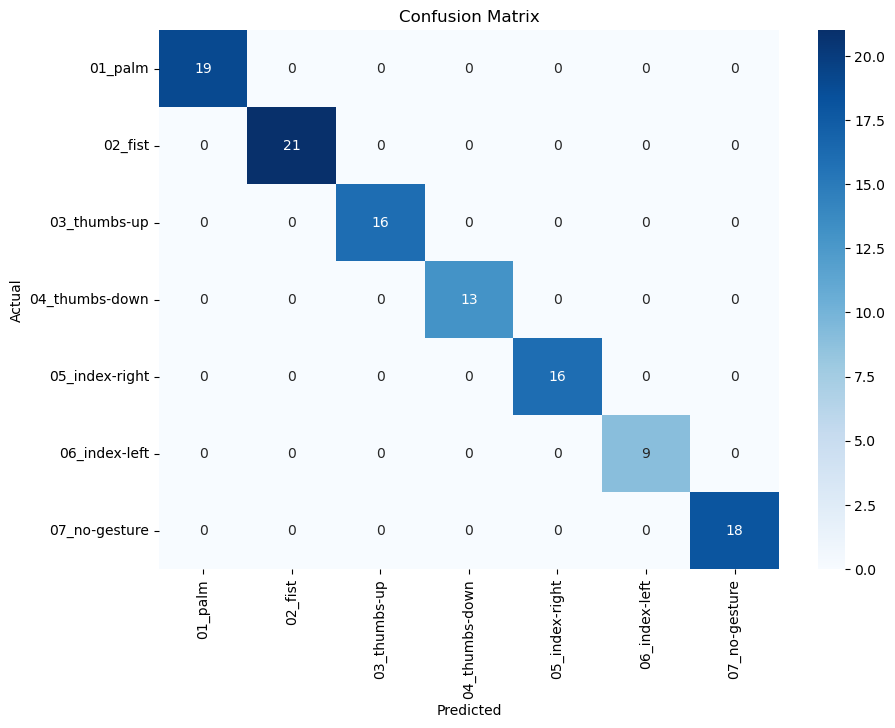

In [38]:
history=model.fit(x_train,y_train, epochs=10,batch_size=32,validation_data=(x_test,y_test))


from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



train_accuracy = history.history['accuracy']  # List of training accuracies for each epoch
print(f'Training Accuracy: {train_accuracy[-1]:.4f}')  # Print the last epoch's training accuracy


y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels
y_true = np.argmax(y_test, axis=1) 

cm = confusion_matrix(y_true, y_pred_classes)
print(classification_report(y_true, y_pred_classes, target_names=classes))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



model.save('C:/GestureIEEE/gesture_model.h5')

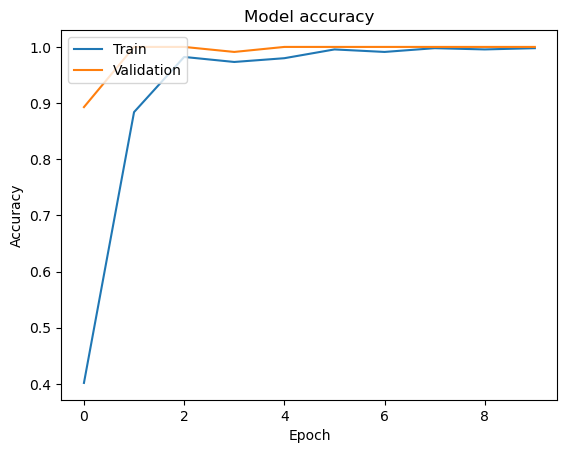

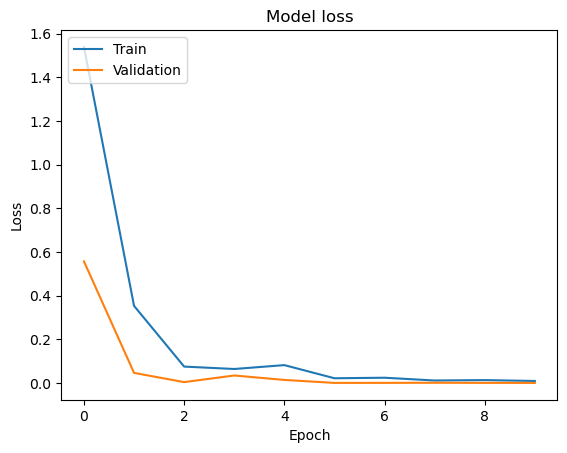

In [39]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:

loss, accuracy=model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 9.0020e-05
Test Loss: 9.258557838620618e-05
Test Accuracy: 1.0


In [41]:
from tensorflow.keras.models import load_model
model=load_model('C:/GestureIEEE/gesture_model.h5')

In [42]:
import cv2
import numpy as np
import pyautogui
import time
from tensorflow.keras.models import load_model

# Load your pre-trained gesture model
model = load_model('C:/GestureIEEE/gesture_model.h5')

# ['07_no-gesture', '01_palm', '02_fist', '04_thumbs-down', '03_thumbs-up', '05_index-right', '06_index-left']
gesture_actions = {
    0: "no-action",     # no-gesture
    1: "play/pause",    # Palm Open
    2: "mute",          # Fist
    3: "volume_down",   # Thumbs down
    4: "volume_up",     # Thumbs up
    5: "forward",       # Index-right
    6: "rewind"         # Index-left
    
}

cap = cv2.VideoCapture(0)
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    frame_count += 1
    if frame_count % 5 != 0:  # Process every 5th frame
        continue

    # Convert frame to grayscale and resize
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    resized_frame = cv2.resize(gray_frame, (64, 64))  # Resize to 64x64
    normalized_frame = resized_frame / 255.0  # Normalize the pixel values
    
    input_frame = np.expand_dims(normalized_frame, axis=0)  # Add batch dimension
    input_frame = np.expand_dims(input_frame, axis=-1)  # Add channel dimension for grayscale

    # Model prediction
    start_time = time.time()
    predictions = model.predict(input_frame)
    end_time = time.time()

    print(f'Prediction Time: {end_time - start_time:.4f} seconds')
    print(f'Predictions: {predictions}')  # Debug print

    gesture_index = np.argmax(predictions[0])
    print(f'Predicted Gesture Index: {gesture_index}')  # Debug print

    action = gesture_actions.get(gesture_index, None)
    print(f'Action: {action}')  # Debug print

    # Perform action based on gesture
    if action == "play/pause":
        pyautogui.press('space')
    elif action == "mute":
        pyautogui.press('volumemute')
    elif action == "volume_down":
        pyautogui.press('volumedown')
    elif action == "volume_up":
        pyautogui.press('volumeup')
    elif action == "forward":
        pyautogui.press('right')
    elif action == "rewind":
        pyautogui.press('left')

    # Display the frame with action
    cv2.putText(frame, f'Gesture: {action}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('Gesture-Controlled Media Player', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Prediction Time: 0.2716 seconds
Predictions: [[0.07852996 0.00291495 0.00313717 0.00328988 0.00529641 0.0036255
  0.9032061 ]]
Predicted Gesture Index: 6
Action: rewind
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction Time: 0.0655 seconds
Predictions: [[0.05913269 0.00329131 0.00283144 0.00319167 0.00459522 0.00314152
  0.92381614]]
Predicted Gesture Index: 6
Action: rewind
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction Time: 0.0732 seconds
Predictions: [[0.07031529 0.00366236 0.00293583 0.00402602 0.00522201 0.00331198
  0.9105265 ]]
Predicted Gesture Index: 6
Action: rewind
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction Time: 0.0575 seconds
Predictions: [[0.06916757 0.00391746 0.00285756 0.00320854 0.00485964 0.00350793
  0.91248125]]
Predicted Gesture Index: 6
Action: rewind
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction Time: 0.0653 seconds
Predictions: [[0.0677596  0.00348178 0.00274357 0.00335285 0.00478553 0.00365997
  0.91421664]]
Pr